<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Excercise 1

## Point a

Compute the capacity of all the cuts and find the minimum capacity to be removed for no feasible flow from o to d to exist.

In [211]:
#Import liberries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [212]:
#Create the graph
def create_graph():
  G = nx.DiGraph()
  G.add_edge('o', 'a', capacity=3)  # e1
  G.add_edge('o', 'b', capacity=3)  # e3
  G.add_edge('b', 'd', capacity=2)  # e4
  G.add_edge('a', 'd', capacity=2)  # e2
  G.add_edge('a', 'b', capacity=1)  # e7
  G.add_edge('b', 'c', capacity=3)  # e5
  G.add_edge('c', 'd', capacity=1)  # e6

  return G


In [213]:
G= create_graph()

In [214]:
#Define the static positions of the nodes
pos = {"o": (40, 20), "a": (60, 35), "b": (60, 20), "c": (60, 5), "d": (80, 20)}

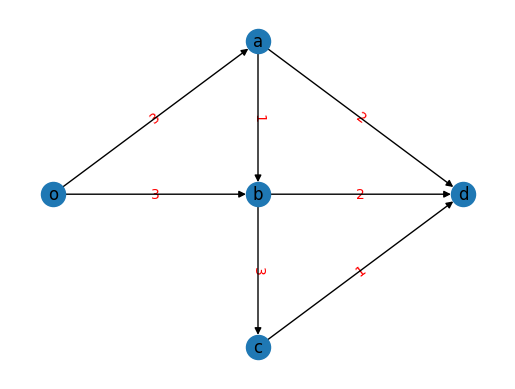

In [215]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"):'3',("o","b"):'3',("a","d"):'2',("b","d"):'2',("b","c"):'3',("c","d"):'1',("a","b"):'1'},font_color='red')
nx.draw(G, pos, with_labels=True)

According to the min-cut theorem, when we calculate the min-cut capacity, we obtain the minimum capacity among all cuts between the source and destination nodes, 𝑜-𝑑.

In the maximum flow problem, a flow is feasible if it satisfies the following constraints:

*   It has no negative throughput.
*   It respects the capacity limits.
*   It maintains mass conservation at each node..

Moreover, by analyzing the min-cuts, we can observe that the minimum capacity belongs to the final cut.

The minimum total capacity that needs to be removed from the network to make
𝑑 unreachable from 𝑜 coincides with the min-cut capacity. In this case, it corresponds to the cut between {o,a,b,c} and {d}, with a total capacity of 5.



**Cuts**
- $U=\{o\},U^C=\{a,b,c,d\}$ -> $C_U = 6$
- $U=\{o,a\},U^C=\{b,c,d\}$ -> $C_U = 6$
- $U=\{o,a,b\},U^C=\{c,d\}$ -> $C_U = 7$
- $U=\{o,a,b,c\},U^C=\{d\}$ -> $C_U = 5$

In [216]:
#Further-theorem
nx.algorithms.flow.minimum_cut(G,"o","d")

(5, ({'a', 'b', 'c', 'o'}, {'d'}))

In [217]:
G.edges()

OutEdgeView([('o', 'a'), ('o', 'b'), ('a', 'd'), ('a', 'b'), ('b', 'd'), ('b', 'c'), ('c', 'd')])

In [218]:
# Función para calcular la capacidad de un corte dado

def calculate_cut_capacity(U, U_complement, G):
    capacity = 0
    for u in U: #Iterate over the reachable nodes
        for v in G[u]: #Iterate over the edges of the reachable nodes
            if v in U_complement:#If the edge is shared with the non_reachable section (which in the first case would be a connection with d)
                capacity += G[u][v]['capacity']
    return capacity

# Lista de cortes específicos que queremos calcular
cuts = [
    ({'o'}, {'a', 'b', 'c', 'd'}),
    ({'o', 'a'}, {'b', 'c', 'd'}),
    ({'o', 'a', 'b'}, {'c', 'd'}),
    ({'o', 'a', 'b', 'c'}, {'d'})
]

# Cálculo de los cortes y su capacidad
def get_all_capacities(G):
  capacities=[]
  for U, U_complement in cuts:
      capacity = calculate_cut_capacity(U, U_complement, G)
      capacities.append(capacity)
      print(f"U = {U}, U^C = {U_complement} -> C_U = {capacity}")

  return np.array(capacities)




In [219]:
get_all_capacities(G)

U = {'o'}, U^C = {'b', 'a', 'c', 'd'} -> C_U = 6
U = {'a', 'o'}, U^C = {'b', 'c', 'd'} -> C_U = 6
U = {'b', 'a', 'o'}, U^C = {'c', 'd'} -> C_U = 7
U = {'b', 'a', 'o', 'c'}, U^C = {'d'} -> C_U = 5


array([6, 6, 7, 5])

## Point b
You are given $x = 0$ extra units of capacity (x e Z). How should you distribute them in order to maximize the throughput that can be sent from o to d? Plot the maximum throughput from o to d as a function of $x \geq 0$.



**Max flow min cut Theorem**: the maximal flow that can send from $o$ to $d$ equals the minimal cut capacity among the o-d cuts of the network.

In [220]:
# Current maxim flow
min_cut= nx.algorithms.flow.maximum_flow(G,"o","d")
# we gey the maximal throughput, plus a dictionary containing the value of the flow that goes through each edge.
min_cut

(5,
 {'o': {'a': 3, 'b': 2},
  'a': {'d': 2, 'b': 1},
  'b': {'d': 2, 'c': 1},
  'd': {},
  'c': {'d': 1}})

The extra units of capacity should be allocated along the edges of the min-cut to balance capacities between cuts without creating or increasing bottlenecks. This allocation is done incrementally, adding one unit at a time along the min-cut edges. After each allocation, the min-cut is recalculated to check if capacities have changed or if a new min-cut has been created.

In [221]:
def compute_max_flow_min_cut(G):

    # Compute minimum cut (capacity of the cut)
    _, partition = nx.minimum_cut(G, 'o', 'd')

    # Get the edges in the minimum cut
    reachable, non_reachable = partition #In the first case the reachable variable corresponds to o,a,b,c and non_reachable to d.


    cutset={} #Start dictionary to save the edges between the cuts
    esges=[]

    for u in reachable: #Iterate over the reachable nodes
        for v in G[u]: #Iterate over the edges of the reachable nodes
            if v in non_reachable:#If the edge is shared with the non_reachable section (which in the first case would be a connection with d)
              #cutset[G[u][v]['capacity']]=(u, v) #Save the edges that connect the cuts
              esges.append((u,v))

    return esges, reachable

   # return cutset

In [222]:
G=create_graph()
borders,reachable = compute_max_flow_min_cut(G) #We get the borders that connect U and Uc

In [223]:
borders

[('b', 'd'), ('a', 'd'), ('c', 'd')]

In [224]:
reachable

{'a', 'b', 'c', 'o'}

In order to assign the extra capacities we need to know also what are the shared edges of the cuts because in this way if we increase one unit to one of this common edges we will be increassing the capacity of 2 min-cuts

In [225]:
common_borders={}
common_borders[0]= [("o","b")] #The first cut share the edge e3 with the cut #2
common_borders[1]= [("a","d"), ("o","b")] #The second cut shares the edge e2 with the cut #3 and #4
common_borders[2]= [("a","d"), ("b","d")] #The third cut shares the edge e2 with the cuts #3 and #4 and e4 with the cut#4
common_borders[3]=[("a","d"), ("b","d")] #The forth cut shares the edges e2 and e4 with the cut #3

In [226]:
set('ab').intersection({'a'})

{'a'}

In [227]:
set(common_borders[1])

{('a', 'd'), ('o', 'b')}

In [228]:
set(common_borders[0])

{('o', 'b')}

In [229]:
set(common_borders[1]).intersection(set(common_borders[0]))

{('o', 'b')}

In [230]:
set(common_borders[1]).intersection(set(common_borders[2])).intersection(set(common_borders[3]))

{('a', 'd')}

In [231]:
set(common_borders[0])


{('o', 'b')}

In [232]:
common_borders

{0: [('o', 'b')],
 1: [('a', 'd'), ('o', 'b')],
 2: [('a', 'd'), ('b', 'd')],
 3: [('a', 'd'), ('b', 'd')]}

In [233]:
#We need to know which number of cut is the mincut
def get_numcut():

  for num_cut in range(len(cuts)):
    if sorted(cuts[num_cut][0])==sorted(reachable):
      number_cut=num_cut

  return number_cut

In [234]:
num= get_numcut()

In [235]:
capacities= get_all_capacities(G)

U = {'o'}, U^C = {'b', 'a', 'c', 'd'} -> C_U = 6
U = {'a', 'o'}, U^C = {'b', 'c', 'd'} -> C_U = 6
U = {'b', 'a', 'o'}, U^C = {'c', 'd'} -> C_U = 7
U = {'b', 'a', 'o', 'c'}, U^C = {'d'} -> C_U = 5


In [236]:
capacities
mask= capacities==6
positions=np.where(mask)
positions

(array([0, 1]),)

In [237]:
for i in range(len(positions)):
              if i+1>len(positions):
                break
              selected_border= set(common_borders[i]).intersection(set(common_borders[i+1]))

In [238]:
a=selected_border.pop()

In [239]:
a[0]

'o'

In [240]:
common_borders[0]

[('o', 'b')]

In [241]:
set(common_borders[positions[0][0]]).intersection(set(common_borders[positions[0][1]]))  # Iniciar con el primer conjunto de bordes

{('o', 'b')}

We need to satisfy that when there are more than 1 minucut the edge which must be located the extracapacity is the one that is shared by them

In [246]:
def assign_capacities(x):

  max_flows = {}
  G=create_graph()
  i=0

  while True:
      if i == x :
          break

      elif i>0:
          min_cut= nx.algorithms.flow.maximum_flow(G,"o","d")
          #calculate the borders of the min_cut
          borders,reachable = compute_max_flow_min_cut(G)
          print(f"borders{borders}")

          #Get all the mincuts
          capacities= get_all_capacities(G) #get the capacities of the cuts
          mask= capacities==min_cut[0] #Create a mask to know the cuts with the cpacity of the min_cut
          positions= np.where(mask) #Position of all the mincuts

          #If just there is a mincut
          if len(positions)==1:
            #Get the minimum value of the borders of the mincut
            #min_capacity_border = min(borders.values())
            min_capacity_border = np.argmin([G[edge[0]][edge[1]]['capacity'] for edge in borders])
            print(f"cut with min capacity {np.array(cuts)[mask]}")

            #Get the border with the minimum value
            u,v =borders[min_capacity_border]
            print(f"u{u},v{v}")

            #Assign the capacity
            G[u][v]['capacity'] += 1
            print(f"The edge between {u} and {v} {G[u][v]['capacity']} has increase 1 unit")

          else:
            #get common borders of the mincuts

            for i in range(len(positions)):
              if i+1>len(positions):
                break
              selected_border= set(common_borders[i]).intersection(set(common_borders[i+1]))

            nodes=selected_border.pop()
            u=nodes[0]
            v=nodes[1]
            G[u][v]['capacity'] += 1
            print(f"The edge between {u} and {v} {G[u][v]['capacity']} has increase 1 unit")

          max_flows[i],_=nx.algorithms.flow.maximum_flow(G,"o","d")

      i +=1

  return max_flows


borders[('b', 'd'), ('a', 'd'), ('c', 'd')]
U = {'o'}, U^C = {'b', 'a', 'c', 'd'} -> C_U = 6
U = {'a', 'o'}, U^C = {'b', 'c', 'd'} -> C_U = 6
U = {'b', 'a', 'o'}, U^C = {'c', 'd'} -> C_U = 7
U = {'b', 'a', 'o', 'c'}, U^C = {'d'} -> C_U = 5
cut with min capacity [[{'b', 'a', 'o', 'c'} {'d'}]]
uc,vd
The edge between c and d 2 has increase 1 unit
borders[('b', 'd'), ('a', 'd'), ('c', 'd')]
U = {'o'}, U^C = {'b', 'a', 'c', 'd'} -> C_U = 6
U = {'a', 'o'}, U^C = {'b', 'c', 'd'} -> C_U = 6
U = {'b', 'a', 'o'}, U^C = {'c', 'd'} -> C_U = 7
U = {'b', 'a', 'o', 'c'}, U^C = {'d'} -> C_U = 6
cut with min capacity [[{'o'} {'b', 'a', 'c', 'd'}]
 [{'a', 'o'} {'b', 'c', 'd'}]
 [{'b', 'a', 'o', 'c'} {'d'}]]
ub,vd
The edge between b and d 3 has increase 1 unit
borders[('a', 'd'), ('a', 'b'), ('o', 'b')]
U = {'o'}, U^C = {'b', 'a', 'c', 'd'} -> C_U = 6
U = {'a', 'o'}, U^C = {'b', 'c', 'd'} -> C_U = 6
U = {'b', 'a', 'o'}, U^C = {'c', 'd'} -> C_U = 8
U = {'b', 'a', 'o', 'c'}, U^C = {'d'} -> C_U = 7
cut with

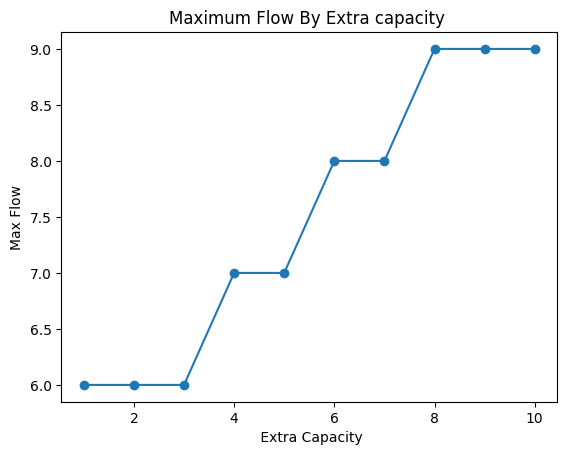

In [247]:
max_flows = assign_capacities(11)

plt.plot(max_flows.keys(), max_flows.values(), marker = 'o')

# Plot formatting
plt.xlabel(' Extra Capacity')
plt.ylabel('Max Flow')
plt.title('Maximum Flow By Extra capacity ')
plt.show()

## Point c

De acuerdo con las capacidades de las aristas, los enlaces entre los nodos a-d y c-d son los de menor capacidad, por lo que aquí se está configurando claramente un cuello de botella, de forma que si se añadiera un nuevo enlace entre a y d, se configuraría un camino directo entre a y d, ya que las capacidades entre  
o → b → d serían las mismas, y sólo restaria distribuir proporcionalmente las capacidades adicionales entre los edges que presentan cuellos de botella

In [ ]:
def compute_max_flow_min_cut(G):

    # Compute minimum cut (capacity of the cut)
    _, partition = nx.minimum_cut(G, 'o', 'd')

    # Get the edges in the minimum cut
    reachable, non_reachable = partition


    cutset={}
    for u in reachable:
        for v in G[u]:
            if v in non_reachable:
                cutset[G[u][v]['capacity']]=(u, v)


    return cutset
max_flows = {}


G=create_graph()
i=0
G.add_edge('o', 'c', capacity=1)
while True:
    if i == 11 :
        break
    elif i>0:
        borders = compute_max_flow_min_cut(G)

        min_capacity_border = min(borders.keys())
        u,v =borders[min_capacity_border]
        G[u][v]['capacity'] += 1
        max_flows[i],_=nx.algorithms.flow.maximum_flow(G,"o","d")
    i +=1

plt.plot(max_flows.keys(), max_flows.values(), marker = 'o')

# Plot formatting
plt.xlabel(' Extra Capacity')
plt.ylabel('Max Flow')
plt.title('Maximum Flow By Extra capacity ')
plt.show()


Del ejercicio anterior se desprende de que manera se debe distribuir los  incremento unitarios sobre las aristas de la red. en funcion maximizar el througput de la red . ahora luego de  establecerse dicha distribucion. se tendria un MultiGrafo G'. sobre el cual se puede establecer que el maximo flow es igual al mincut, el cual fija  entre otras cosas que el corte minimo sobre G' debe configurarse de manera que dicho corte genere los siguientes conjuntos  U={'o'} y U"={'c', 'a', 'd', 'b'}. al establecer dicha particion encontramos que los edges e1 y e3 son los borders que interconectan los conjuntos U y U", de forma que una estrategia para maximar el throughput apartir del configuracion de un nuevo edge sobre la red, seria incrementando el mincut de forma que dicha particion involucre un nuevo border aparte de e1 y e3. ahora si establecemos un nuevo edge e8 entre los nodos o y c, encontramos que efectivamente dicho edge sera un nuevo border perteneciente a dicha particion el cual incrementa la capacidad asociada al mincut= C(e1)+C(e3)+C(e8) y por ende Maximo Throughput. hecho que efectivamente se constata en el anterior grafico


Add the extra edge to the original graph

In [ ]:
G.add_edge('o', 'c', capacity=1) #add directed link e8

#Plot the new graph
nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"):'3',("o","b"):'3',("a","d"):'2',("b","d"):'2',("b","c"):'3',("c","d"):'1',("a","b"):'1', ("o","c"):1},font_color='blue')
nx.draw(G, pos, with_labels=True) #We have two rows so it is an undirected graph

In [ ]:
#Use the previous function to know where to allocate the extra capacity
